<a href="https://colab.research.google.com/github/yohanesnuwara/starting-computer-vision/blob/main/Lesson_05_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import glob 
import os

import matplotlib.pyplot as plt
# import matplotlib.patches as mpl
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
for f in glob.glob('/content/sample_data/*.csv'):
  print(f)

/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_test.csv


Upload cactus dataset

In [ ]:
!unzip '/content/Cactus Detection.v2i.yolov5pytorch.zip'

Archive:  /content/Cactus Detection.v2i.yolov5pytorch.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/cactus01_jpg.rf.db928176f341b56036dcbdf110df2b6a.jpg  
 extracting: test/images/cactus14_jpg.rf.9a6234368447a0ea184f587c0f6395c3.jpg  
   creating: test/labels/
 extracting: test/labels/cactus01_jpg.rf.db928176f341b56036dcbdf110df2b6a.txt  
 extracting: test/labels/cactus14_jpg.rf.9a6234368447a0ea184f587c0f6395c3.txt  
   creating: train/
   creating: train/images/
 extracting: train/images/cactus02_jpg.rf.4b41d9cf35ef581054b34d6122ff4e8e.jpg  
 extracting: train/images/cactus02_jpg.rf.e8108a9b3b4a7ad2046a0b04d8189b83.jpg  
 extracting: train/images/cactus02_jpg.rf.ea16f36152ea9f41c81f1849ef1b0539.jpg  
 extracting: train/images/cactus03_jpg.rf.63068c8588537647f6778dfc5aa83148.jpg  
 extracting: train/images/cactus03_jpg.rf.ac8fe4983b44b276b6f23c69

Setup YOLO

torch --> pandas A, numpy, matplotlib, sklearn
pandas B
torch can't work

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils

Cloning into 'yolov5'...
remote: Enumerating objects: 12719, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 12719 (delta 86), reused 126 (delta 73), pack-reused 12575
Receiving objects: 100% (12719/12719), 12.37 MiB | 17.97 MiB/s, done.
Resolving deltas: 100% (8741/8741), done.
/content/yolov5
     |████████████████████████████████| 596 kB 40.7 MB/s 
     |████████████████████████████████| 750.6 MB 12 kB/s 
     |████████████████████████████████| 21.0 MB 1.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.0 requires torch==1.12.0, but you have torch 1.11.0 which is incompatible.
torchaudio 0.12.0+cu113 requires torch==1.12.0, but you have torch 1.11.0 which is incompatible.


In [ ]:
%%writefile /content/yolov5/cactus.yaml
train: /content/train
val: /content/valid
nc: 1
names: ["cactus"]

Overwriting /content/yolov5/cactus.yaml


Train YOLO

In [ ]:
!python train.py --img 250 --batch 100 --epochs 300 --data cactus.yaml --weights yolov5s.pt --save-period 3 --name detector

train: weights=yolov5s.pt, cfg=, data=cactus.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=100, imgsz=250, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=3, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-304-g51fb467 Python-3.7.13 torch-1.11.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4,

In [ ]:
# !zip -r '/content/cactus_detector.zip' '/content/yolov5/runs/train/exp'

Test YOLO

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 250 --source /content/test/images --save-txt

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/test/images, data=data/coco128.yaml, imgsz=[250, 250], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-304-g51fb467 Python-3.7.13 torch-1.11.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/2 /content/test/images/cactus01_jpg.rf.db928176f341b56036dcbdf110df2b6a.jpg: 256x256 6 cactuss, Done. (0.006s)
image 2/2 /content/test/images/cactus14_jpg.rf.9a6234368447a0ea184f587c0f6395c3.jpg: 256x256 63 cactuss, Done. (0.006s)
Speed: 0.2ms pre-process, 6.1ms inference, 1.4ms NMS per image at shape (1, 3, 256, 256)
Results saved to

Visualize prediction result

In [ ]:
def get_bounding_box(image, label):
  # Returns x0, y0 as bottom left coordinate and x1, y1 as top right coordinate
  img = cv2.imread(image)
  w_img, h_img, ch_img = img.shape

  lab = np.loadtxt(label)

  # Get palm class, center coordinates, width, and height from label data
  pclass, xc, yc, w, h = lab[:,0], lab[:,1], lab[:,2], lab[:,3], lab[:,4]

  # Calculate center coordinates in pixels
  x_lab, y_lab = xc * w_img, yc * h_img

  # Calculate width and height of label in pixels: w relative, h_relative, y, h
  w_lab, h_lab = w * w_img, h * h_img

  # Calculate offset
  x_ofset, y_ofset = w_lab / 2, h_lab / 2

  # Calculate x0, y0
  x0, y0 = (x_lab - x_ofset).astype(int), (y_lab - y_ofset).astype(int)

  # Calculate x1, y1
  x1, y1 = (x0 + w_lab).astype(int), (y0 + h_lab).astype(int)  
  return pclass, x0, y0, x1, y1

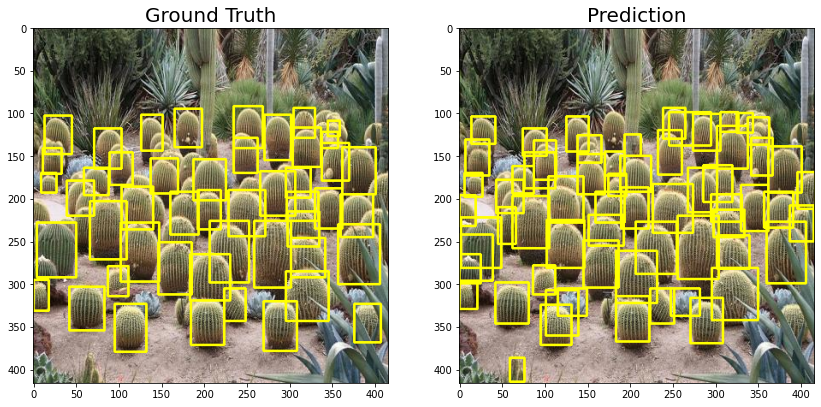

In [ ]:
id = 'cactus14_jpg.rf.9a6234368447a0ea184f587c0f6395c3'

image = '/content/test/images/' + id + '.jpg'
label = '/content/test/labels/' + id + '.txt'
pred = '/content/yolov5/runs/detect/exp3/labels/' + id + '.txt'

# Get bounding box coordinates (groundtruth)
pclass, x0, y0, x1, y1 = get_bounding_box(image, label)

# Get bounding box coordinates (detection)
pclass_pred, x0_pred, y0_pred, x1_pred, y1_pred = get_bounding_box(image, pred) 

plt.figure(figsize=(14,14))

# Plot 1: Ground truth
plt.subplot(1,2,1)
img = cv2.imread(image)

for i in range(len(x0)):
  a, b = x0[i], y0[i]
  c, d = x1[i], y1[i]

  # Plot bounding box
  color = (0,255,255)
  thickness = 2
  f = cv2.rectangle(img, (a,b), (c,d), color, thickness)
  f = cv2.cvtColor(f, cv2.COLOR_BGR2RGB)
  
  # Plot image
  plt.imshow(f)
  plt.title('Ground Truth', size=20)

# Plot 2: Detection
plt.subplot(1,2,2)
img = cv2.imread(image)

for i in range(len(x0_pred)):
  a, b = x0_pred[i], y0_pred[i]
  c, d = x1_pred[i], y1_pred[i]

  # Plot bounding box
  color = (0,255,255)
  thickness = 2
  h = cv2.rectangle(img, (a,b), (c,d), color, thickness)
  h = cv2.cvtColor(h, cv2.COLOR_BGR2RGB)
  
  # Plot image
  plt.imshow(h)  
  plt.title('Prediction', size=20)

plt.show()